In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

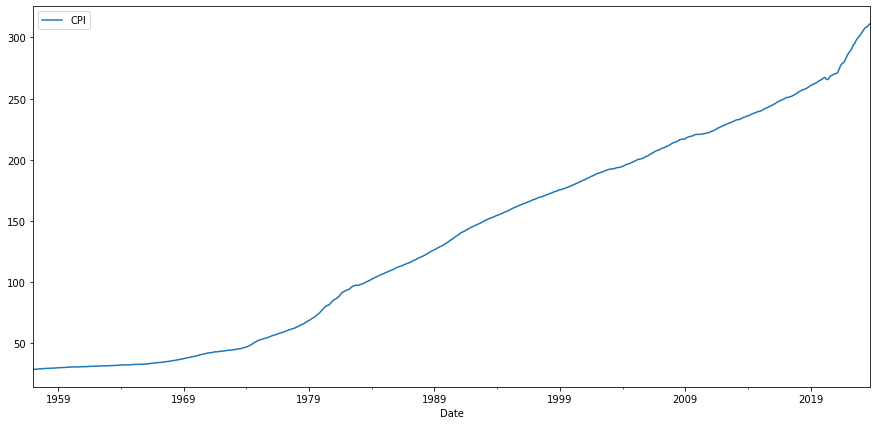

In [27]:
df=pd.read_csv('ConsumerPriceIndex.csv')

df.columns=["Date","CPI"]
df.describe()
df.set_index('Date',inplace=True)
df.index = pd.to_datetime(df.index)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()
plt.savefig("CPI_Plot.png", dpi =300, facecolor = "white")


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shreenidhichundi/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


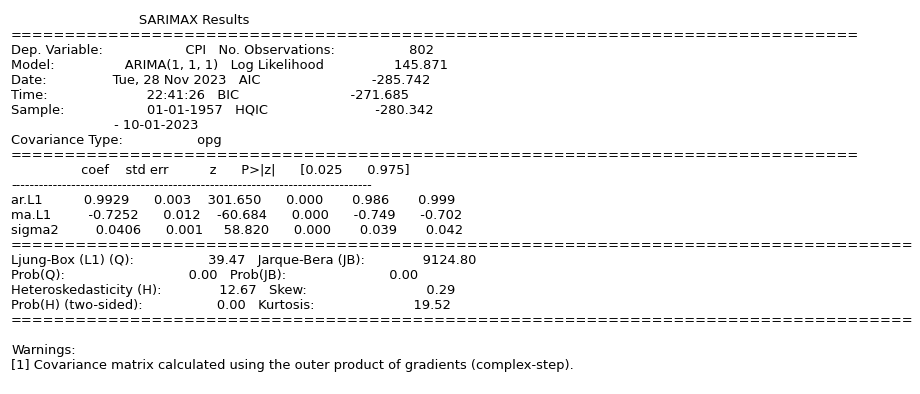

In [28]:
# from statsmodels.tsa.arima.model import ARIMA
# model=ARIMA(df['CPI'],order=(1,1,1))
# model_fit=model.fit()
# model_fit.summary()
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

model = ARIMA(df['CPI'], order=(1, 1, 1))
model_fit = model.fit()
plt.rc('figure', figsize=(7, 7))
plt.text(0.01, 0.05, str(model_fit.summary()), {'fontsize': 13})
plt.axis('off')
plt.tight_layout()
plt.savefig("ARIMA_Model.png", bbox_inches='tight', facecolor = "white")

In [29]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['CPI'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


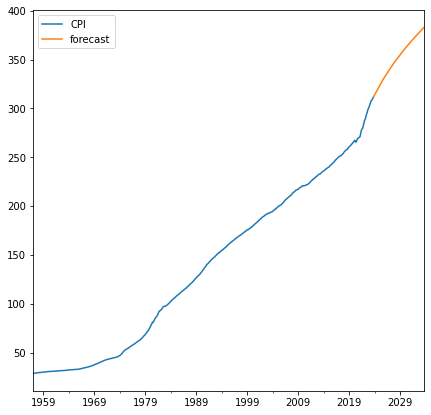

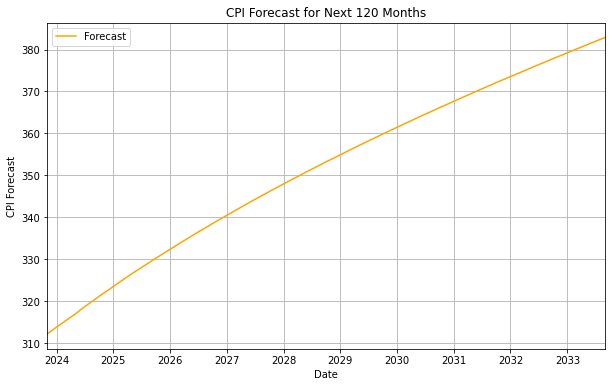

In [30]:
#2 year forcast:
# from pandas.tseries.offsets import DateOffset
# future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
# future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

# future_datest_df.tail()

# future_df=pd.concat([df,future_datest_df])

# future_df['forecast'] = results.predict(start = 802, end = 826, dynamic= True)
# future_df[['CPI', 'forecast']].plot()
# plt.savefig("Overall_2Year_Forecast.png", dpi =300, facecolor = "white")

# future_df = pd.concat([df, future_datest_df])
# future_df['forecast'] = results.predict(start=802, end=922, dynamic=True)
# forecast_df = future_df[future_df['forecast'].notna()]

# plt.figure(figsize=(10, 6))
# plt.plot(forecast_df.index, forecast_df['forecast'], color='orange', label='Forecast')
# plt.title('CPI Forecast for Next 24 Months', color='black')
# plt.xlabel('Date', color='black')
# plt.ylabel('CPI Forecast', color='black')
# plt.grid(True)
# plt.xlim(forecast_df.index.min(), forecast_df.index.max())
# plt.legend() 
# plt.savefig("2Year_Forecast.png", dpi=300, facecolor="white")
# plt.show()

# __________________________________________________________________________________

#10 Year Forecast:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,120)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 802, end = 922, dynamic= True)
future_df[['CPI', 'forecast']].plot()
plt.savefig("Overall_10Year_Forecast.png", dpi =300, facecolor = "white")
future_df = pd.concat([df, future_datest_df])
future_df['forecast'] = results.predict(start=802, end=922, dynamic=True)
forecast_df = future_df[future_df['forecast'].notna()]

plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df['forecast'], color='orange', label='Forecast')
plt.title('CPI Forecast for Next 120 Months', color='black')
plt.xlabel('Date', color='black')
plt.ylabel('CPI Forecast', color='black')
plt.grid(True)
plt.xlim(forecast_df.index.min(), forecast_df.index.max())
plt.legend()  
plt.savefig("10Year_Forecast.png", dpi=300, facecolor="white")
plt.show()

In [31]:
# Find the regression equation
from sklearn.linear_model import LinearRegression
import numpy as np
date_nums = np.array([(date - forecast_df.index[0]).days for date in forecast_df.index]).reshape(-1, 1)
model = LinearRegression()
model.fit(date_nums, forecast_df['forecast'])
slope = model.coef_[0]
intercept = model.intercept_
print(f"Regression Line Equation: y = {slope:.4f}x + {intercept:.4f}")

Regression Line Equation: y = 0.0193x + 316.6296
